IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:

from google.colab import files
files.upload()

Saving mobile-price-prediction.zip to mobile-price-prediction.zip


{'mobile-price-prediction.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00 \xa0:OR36\xfb\xff\xff\xff\xff\xff\xff\xff\xff\x08\x00\x14\x00test.csv\x01\x00\x10\x00j\xf9\x00\x00\x00\x00\x00\x00\na\x00\x00\x00\x00\x00\x00m\xbd\xeb\xae \xb9q\xa5\xfb\xdf\x80\xdf\x84(\xf0\x9a\x99|\x9a\x86-\xb5G\x8d\x91,AjC3o?\\\xdf\n&\xb3t\x0e\xe4nw\xed\xda\x99I\x06\xe3\xb2\xe2\xca\xdf\xfe\x98\xfe\xf3?~\xff\xfd\xd7\xbf\xff\xdf_\xfe\xf6\xd7\x7f\xfe\xfa\xf7\xf4\x9f\x7f\xfe\x9f_\xd3\x1f\xfe\xfc\xd7?\xfc\xef_\xfe\xf1\xb7_\x7f\xfdc\xfa\xe3\xff\xfc\xc7\x9f\x7f\xf9\xc7o\x7fI\xff\xf5\x87\xf4_\x7f\xfd\x9f\xbf\xff\xf2\xbf\xd2o\xff\xfd\xfb/\x7f\xf9\xf5/\x7f\xfd\xfb\xffM\x7f\xf9\xe5\x8f\xbf\xfe-\xfd\xe5\xaf\xff\xf9\xdb\x9f\x7f\xfd\xe5\x9f\xbf\xa7\xff\xfe\xe5\x0f\x7f\xfd\xfb\xaf\xffH\x7f\xfbC\xfa\xdb\xff\xf9\xe5O\xbf\xfe\xf6\xbf\xfe\xf4\xbb\xfe\xeb\x9f\xbf\xfd\xf1\xf7?\xa5\xbf\xff\xc7_\xd2?\xfe\xf0\xcb\x9f\xf4\xaf\x7f\xa6\xdf\xff\xe3\xcf\xff\xfb\x97\xdf\x7f\xfb\xcb\xaf\xe9\xf7?\xfd\xfd\xd7_\xd7\x8b\x7f\xff\xeb\xff\xfc\xe1O\xbf\xfc\

LOADING THE DATASET

In [ ]:
!unzip mobile-price-prediction.zip

Archive:  mobile-price-prediction.zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
test_data=pd.read_csv('test.csv')
train_data=pd.read_csv('train.csv')
test_data = test_data.drop(['id'], axis = 1)
print(list(train_data.columns))
train_data.head()

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


PREPROCESSING

In [ ]:
std = StandardScaler()
y = train_data['price_range']
X = train_data.drop(['price_range'], axis = 1)
X = std.fit_transform(X)

CHECKING DIFFERENT MODELS

Support vector
89.0


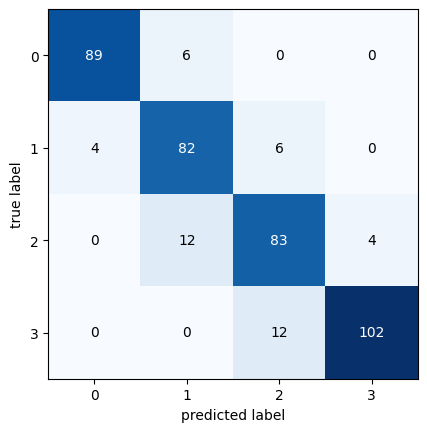



Logistic regression
95.5


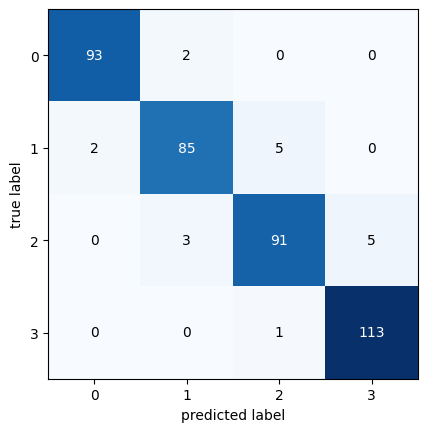



Random Forest
83.0


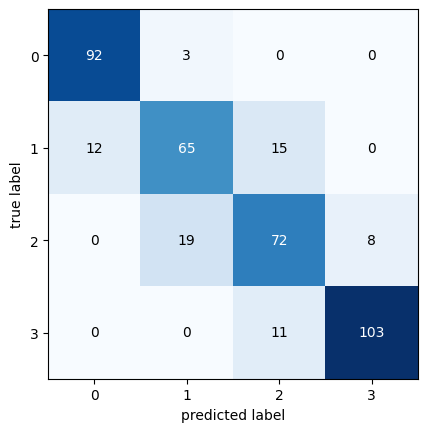



Decision Trees
83.0


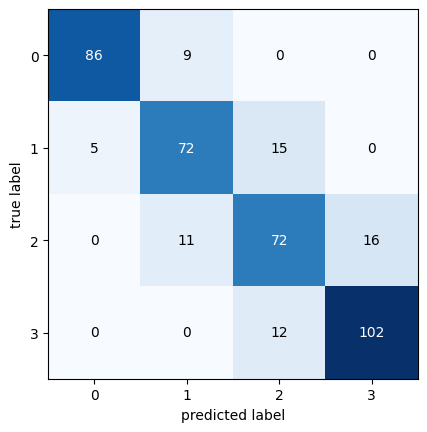



KNeighbourClassifier
51.5


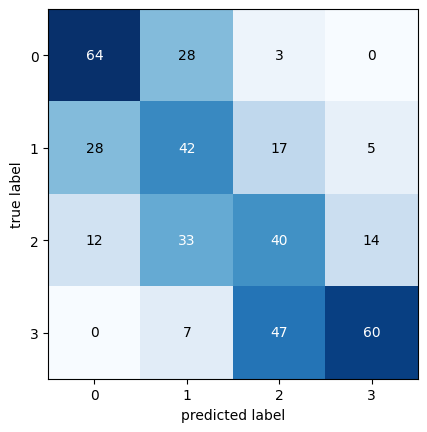



XGBoost
91.5


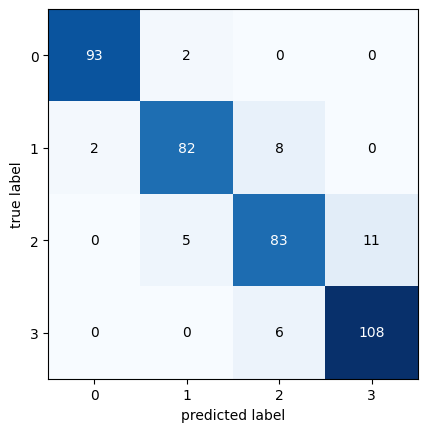



Adaboost
52.0


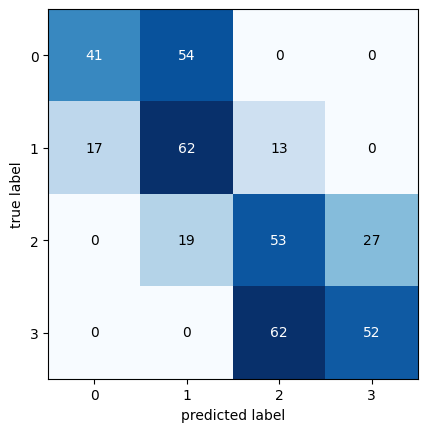



Gradient Boosting
87.75


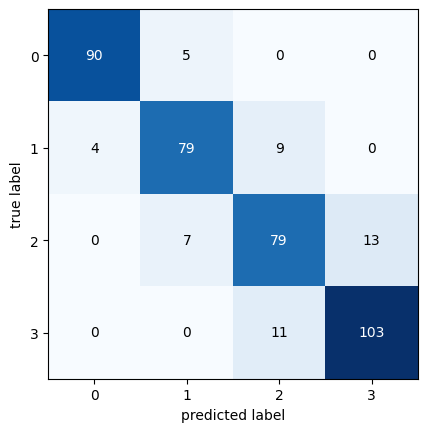



Gaussian Process
72.5


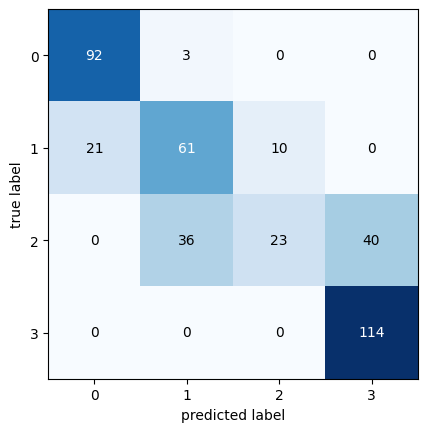

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
models = [[SVC(), "Support vector"],
        [LogisticRegression(), "Logistic regression"],
         [RandomForestClassifier(n_estimators = 10), "Random Forest"],
         [DecisionTreeClassifier(max_depth = 7), "Decision Trees"],
         [KNeighborsClassifier(n_neighbors = 7), "KNeighbourClassifier"],
         [xgb.XGBClassifier(objective="binary:logistic", random_state=42), "XGBoost"],
         [AdaBoostClassifier(n_estimators = 25), "Adaboost"],
         [GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=10, random_state=0), "Gradient Boosting"],
         [GaussianProcessClassifier(kernel=RBF(1.0),random_state=0), 'Gaussian Process']]
for i in models:
    name = i[1]
    model = i[0]
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred) * 100)
    cnf = confusion_matrix(y_test,y_pred)
    fig, ax = plot_confusion_matrix(conf_mat = cnf)
    plt.show()
    print("\n")

OPTIMIZING BEST MODEL

In [ ]:
hyperparameters = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}
model = LogisticRegression()
grid_search = GridSearchCV(model, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

{'C': 100, 'penalty': 'l2'}
0.9712500000000001
0.9675


MODEL EVALUATION

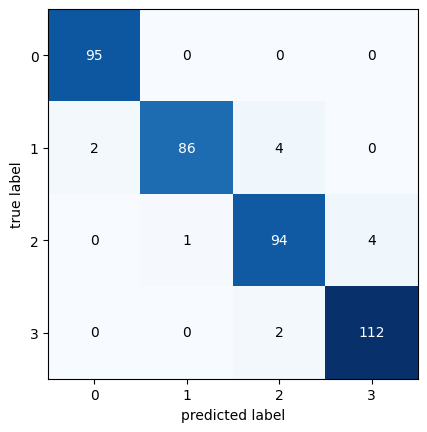

In [ ]:
cnf = confusion_matrix(y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat = cnf)
plt.show()

PREDICTING VALUES


In [ ]:
test_data = std.fit_transform(test_data)
y_pred_test = best_model.predict(test_data)
y_pred_test

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 2, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,